In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import StandardScaler

In [4]:
dataframe = pd.read_csv("C:/Users/supra/Desktop/CS584/data.csv")
dataframe.head(5)
dataframe=dataframe.drop('id',axis=1)
dataframe = dataframe.drop('Unnamed: 32', axis = 1)
dataframe.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
     diagnosis
0            1
1            1
2            1
3            1
4            1
..         ...
564          1
565          1
566          1
567          1
568          2

[569 rows x 1 columns]


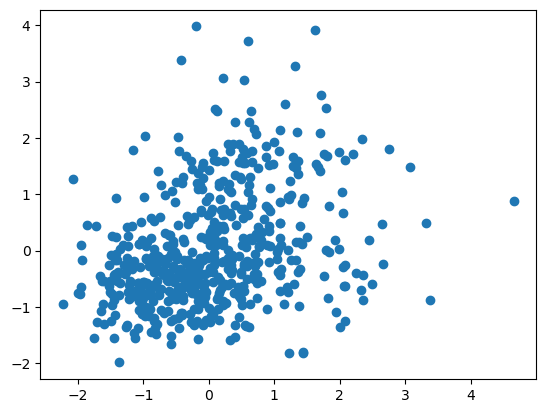

In [5]:
truthlabels = pd.DataFrame()
truthlabels["diagnosis"]=dataframe["diagnosis"].map({'M':1,'B':2})
dataframe=dataframe.drop('diagnosis',axis=1)
dataframe.head(5)
data = dataframe.values 
data = StandardScaler().fit_transform(data)
data=np.array(data)
print(data)
print(truthlabels)
plt.scatter(data[:,1],data[:,2])

In [ ]:
def euclideandistance(i, j):
    sum = np.sum((i-j)**2)
    distance = np.sqrt(sum)
    return distance
size = data.shape[0]         
dist_matrix=[]    
for i in range(size):
    dist_matrix.append([0]*size) # Initialized the distance matrix to all 0's
for i in range(size):
    for j in range(size):
        if i!=j:
            dist_matrix[i][j]=euclideandistance(data[i], data[j]) 
        dist_matrix[j][i] = dist_matrix[i][j]

In [7]:
class AgglomerativeClusteringScratch:
    
    # This funciton calculates the euclidean distance between two vectors with the help of np.sqrt and np.sum
    def euclideandistance(self, vector_1, vector_2):
        sum=np.sum((vector_1-vector_2)**2)
        distance=np.sqrt(sum)
        return distance
    
    #This function gives the single linkage criteria where the minimum distance between two points is considered.The points with the least distance between them form the cluster
    def singlelinkage_function(self, dist_matrix,cluster1,cluster2):
        minimumdist = float('inf')
        for point1 in cluster1:
            for point2 in cluster2:
                if dist_matrix[point1][point2] < minimumdist:
                    minimumdist=dist_matrix[point1][point2]                    
                minimum=minimumdist
        return minimum #Return the least distance between the data points/clusters
    
    # This is the agglomerative clsutering function which first constructs the distance matrix. Then for a given number of clusters k, it keeps on clustering by the single linkage metric till the clusters finally reach the valeu k.
    def agglomerative_clustering_single_linkage(self, data, k):
        size = data.shape[0]         
        dist_matrix=[]     #I took the distance matrix to be a list
        for i in range(size):
            dist_matrix.append([0]*size) # Initialized the distance matrix to all 0's
        for i in range(size):
            for j in range(size):
                if i!=j:
                    dist_matrix[i][j]=self.euclideandistance(data[i], data[j]) #updated the distance matrix with the euclidean distance between the datapoints
                dist_matrix[j][i] = dist_matrix[i][j]   #This is to maintain symmetry
        
        # Here we initiate an empty cluster list and assume each data point to be an individual cluster before merging.
        clusters = []
        for i in range(size):
            clusters.append([i])
        
        # We use the while loop to merge two clusters where k determines the number of clusters to be merged into.
        linkagematrix=[]
        while len(clusters) > k:
            mindistance = float('inf')
            mergeindex_1= 0  #These are the indices which will be used to for the final cluster list i.e they are the points at which the minimum distance occurs
            mergeindex_2= 0 
            for i in range(len(clusters)):
                for j in range(i+1, len(clusters)):
                    distance=self.singlelinkage_function(dist_matrix,clusters[i],clusters[j])   # Calls the single linkage function to determine the pair with the least distances
                    if  distance < mindistance and i!=j:
                        mindistance = distance
                        #print(min_distance)
                        mergeindex_1=i
                        mergeindex_2=j
            
            clusters[mergeindex_1]=clusters[mergeindex_1] +clusters[mergeindex_2] # This merges the cluster points into one cluster(the ones satisfying the if condition)
            clusters.pop(mergeindex_2) # Since after merging we do not need the second cluster point we can delete it.del cluster[mergeindex_2] is also an alternate option to delete
            #print(clusters) #This is to verify is the clustering is being done properly    
            linkagematrix.append([mergeindex_1, mergeindex_2, mindistance, len(clusters)])
            dist_matrix[mergeindex_1][i]= np.inf  #After clustering I set the lowest distance matrix values to infinity so that they are not used anymore
            dist_matrix[i][mergeindex_2]= np.inf  
       
        labels=[]
        for i in range(len(data)):
            labels.append(0) # Initially created labels with all 0's
       
        for i in range(len(clusters)):
            #print(clusters)
            cluster=clusters[i]
            for index in cluster:
                labels[index] = i #Here we set label for the cluster points.All the points in the same cluster receive the same label
        
        return clusters, labels, linkagematrix 


In [8]:
agglomerative = AgglomerativeClusteringScratch() #
clusters = agglomerative.agglomerative_clustering_single_linkage(data,2)[0]
labels = agglomerative.agglomerative_clustering_single_linkage(data,2)[1]
#linkagematrix=agglomerative.agglomerative_clustering_single_linkage(data,2)[2]
print(clusters)
print(labels)
#print(linkagematrix)



[[0, 1, 6, 317, 253, 264, 444, 516, 408, 134, 201, 254, 517, 65, 131, 328, 64, 282, 186, 487, 499, 56, 70, 365, 373, 237, 10, 261, 274, 16, 171, 54, 19, 51, 74, 137, 79, 362, 399, 324, 93, 158, 294, 211, 480, 155, 401, 125, 364, 107, 497, 143, 367, 463, 357, 483, 195, 454, 374, 149, 481, 165, 278, 387, 438, 298, 477, 532, 311, 84, 268, 403, 334, 346, 98, 271, 390, 120, 418, 169, 224, 240, 434, 371, 511, 439, 464, 249, 306, 69, 325, 529, 189, 187, 90, 545, 361, 494, 381, 395, 304, 270, 486, 422, 293, 490, 411, 308, 309, 437, 447, 442, 436, 170, 420, 427, 527, 287, 384, 475, 472, 52, 251, 350, 267, 102, 241, 263, 40, 49, 542, 295, 153, 344, 488, 502, 519, 226, 546, 333, 316, 142, 338, 394, 515, 405, 530, 206, 222, 200, 204, 523, 144, 315, 327, 428, 360, 429, 415, 398, 48, 133, 406, 513, 148, 310, 363, 495, 478, 227, 154, 292, 342, 55, 104, 470, 159, 457, 458, 543, 425, 522, 544, 130, 312, 386, 235, 452, 554, 552, 276, 67, 255, 340, 423, 448, 514, 50, 58, 285, 348, 234, 179, 326, 508, 377

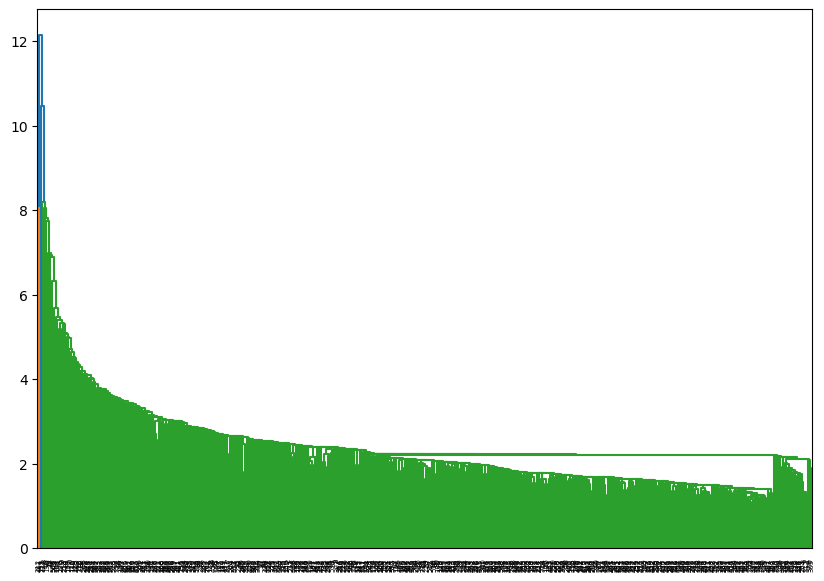

In [9]:
Z=linkage(data[:,2:],"single")
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

Getting the silhouette scores and the Normalized Mutual information values for the labels obtained from the from scratch method

In [10]:
score = silhouette_score(data, labels) #The silhouette score is calculated for the original dataset and the labels obtained
print("Silhouette score:", score)
#print(truthlabels['Class/Cluster']) # This is to just verify if truelabels is correctly assigned
#nmi=normalized_mutual_info_score(truthlabels["Class/Cluster"],labels) # the NMI is calculated for the true labels and the lables obtained through the clustering algorithm
nmi=normalized_mutual_info_score(truthlabels['diagnosis'],labels)
print("Normalized muttual information",nmi)


Silhouette score: 0.6606668813897673
Normalized muttual information 0.010182219220269649


Scatter plot for the Actual Labels and the Cluster labels

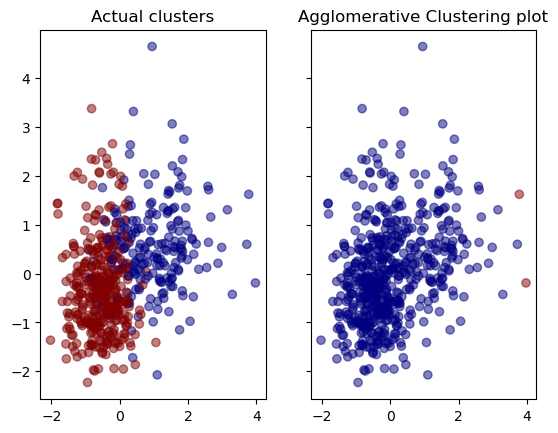

In [11]:
f, (actual_plot, cluster_plot) = plt.subplots(1, 2, sharey=True) 
actual_plot.set_title("Actual clusters")
actual_plot.scatter(data[:,0], data[:,1], c=truthlabels["diagnosis"],cmap="jet",alpha=0.5) # The actual scatter plot for the true labels for the first column and the second column.
cluster_plot.set_title("Agglomerative Clustering plot")
cluster_plot.scatter(data[:,0], data[:,1], c=labels, cmap="jet",alpha=0.5) # The scatterplot obtained for labels after clustering for the first and second column


In [12]:
from sklearn.metrics import silhouette_score,normalized_mutual_info_score
import matplotlib.pyplot as plt
truthlabels=np.ravel(truthlabels)
silhouette_list=[] # This is the list to take the silhouette scores for 10 random cases
nmi_list=[] # This is the list to take the NMI for 10 random cases

for i in range(10):
    indices = list(range(truthlabels.shape[0]))
    np.random.shuffle(indices)
    sampleindices = indices[:int(truthlabels.shape[0]/2)]
    datasamples = data[sampleindices]
    truthlabelsamples= truthlabels[sampleindices]
    ac1 = agglomerative.agglomerative_clustering_single_linkage(data[sampleindices],2)[0]
    ac = agglomerative.agglomerative_clustering_single_linkage(data[sampleindices],2)[1]
    silhouettescore=silhouette_score(datasamples,ac)
    silhouette_list.append(silhouettescore)
    nmiscore=normalized_mutual_info_score(truthlabelsamples,ac)
    nmi_list.append(nmiscore)
    
    

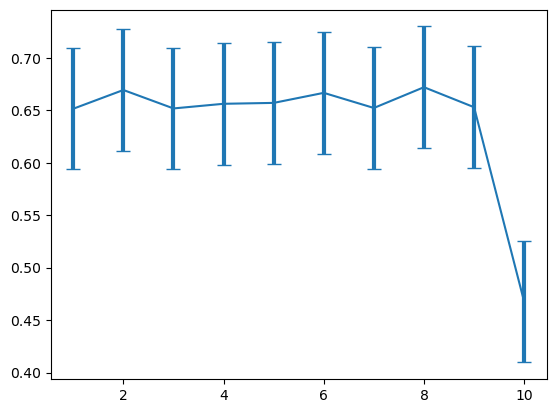

In [13]:
x_value = list(range(1,11))
plt.errorbar(x=x_value,y=silhouette_list,yerr=np.std(silhouette_list),elinewidth=3,capsize=5)
plt.show()

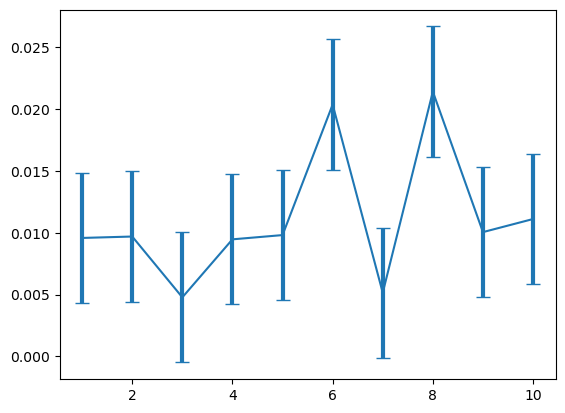

In [14]:
plt.errorbar(x=x_value,y=nmi_list,yerr=np.std(nmi_list),elinewidth=3,capsize=5)
plt.show()